Deepshikha Gautam

Assignment I

Statistical Interpretation and Exploratory Data Analysis (EDA)

Problem 1

Basic Data Exploration & Trend Visualization

Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

Objective

The HDI dataset contains data for multiple years. Since development indicators change over time, the analysis focuses on the most recent year available to reflect the current global development status.

Method

The maximum value in the Year column is identified and used to filter the dataset.

Tasks:
Complete all the Following Tasks:


1.	Extract Latest Year:
•	Identify unique years in the dataset.
•	Filter the dataset to include only observations from the year 2022.
•	Save the filtered dataframe as hdi 2022  df (used for all subsequent tasks in Problem 1A).


2.	Data Exploration:
•	Display the first 10 rows of the 2022 dataset.
•	Count the number of rows and columns.
•	List all column names and their data types.


3.	Missing Values & Data Cleaning:
•	Check for missing values in each column and report total counts.
•	Inspect dataset for:
–	numeric columns stored as text,
–	inconsistent or misspelled country names,
–	duplicate rows,
–	special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
–	convert data types where needed,
–	remove duplicates,
–	handle missing values (drop or impute; justify your choice).


4.	Basic Statistics:
•	Compute the mean, median, and standard deviation of HDI for the year 2022.
•	Identify the country with the highest HDI in 2022.
•	Identify the country with the lowest HDI in 2022.


5.	Filtering and Sorting:
•	Filter countries with HDI {"hdi"} greater than 0.800.
•	Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in descending order.
•	Display the top 10 countries.


6.	Adding HDI Category Column:
•	Create a new column HDI  Category that classifies each country into one of the four official Human Development Index groups. The classification should be based on the HDI value for the year 2022. Use the following categories and thresholds defined by the United Nations Development Programme (UNDP):
HDI Category	HDI Range (hdi)
Low	< 0.550
Medium	0.550 – 0.699
High	0.700 – 0.799
Very	≥0.800
After creating this new column:
•	verify that all countries are classified correctly,
•	ensure the updated dataframe includes the new category column.
•	Save the final dataframe as HDI category added.csv and include this file in your final submission.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

#Accessing the csv file.
file_path = '/content/drive/MyDrive/Human_Development_Index_Dataset.csv'
#Handle the UnicodeDecodeError
df = pd.read_csv(file_path, encoding='latin1')

#Display the first 5 rows of the DataFrame
print(df.head())

   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary_education_m_%  seats_in_

Task 1: Identify Unique Years

Extract Latest Year:

In [4]:
#Identifying the unique years in dataset
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Task 2: Filter Dataset for Year 2022

In [5]:
hdi_2022_df = df[df['year'] == 2022]

#Save for later use
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)


Task 3: Basic Data Exploration

In [6]:
#Basic Data Exploration

#First 10 rows
hdi_2022_df.head(10)

#Number of rows and columns
hdi_2022_df.shape

#Column names and data types
hdi_2022_df.dtypes



,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


Task 4: Missing Values & Data Cleaning

In [7]:
#Missing Values & Data Cleaning

#Check missing values
hdi_2022_df.isnull().sum()



,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [8]:
print(df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republi

In [9]:
#Filter latest year safely
hdi_2022_df = df[df['year'] == 2022].copy()

#Convert numeric columns safely
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['life_expectancy'] = pd.to_numeric(
    hdi_2022_df['life_expectancy'], errors='coerce'
)
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(
    hdi_2022_df['gross_inc_percap'], errors='coerce'
)

In [10]:
#List of non-country entries
non_countries = [
    'Very high human development', 'High human development', 'Medium human development', 'Low human development',
    'Arab States', 'East Asia and the Pacific', 'Europe and Central Asia',
    'Latin America and the Caribbean', 'South Asia', 'Sub-Saharan Africa', 'World'
]

#Keep only the real countries
df_countries = df[~df['country'].isin(non_countries)].copy()

print("Number of rows after removing aggregates/regions:", df_countries.shape[0])
print(df_countries['country'].unique())


Number of rows after removing aggregates/regions: 6435
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary

In [11]:
#Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()


In [12]:
#Handle missing HDI values (core variable)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


Task 5: Basic Statistics (HDI – 2022)

In [13]:
#Compute the mean, median, and standard deviation of HDI for the year 2022.
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [14]:
#Identify the country with the highest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]




,5609
country,Switzerland
hdi,0.967


In [15]:
#Identify the country with the lowest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


Task 6: Filtering & Sorting

In [16]:
#Filter countries with HDI {"hdi"} greater than 0.800.

high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

#Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in descending order.
high_hdi_sorted = high_hdi.sort_values(
    by='gross_inc_percap',
    ascending=False)

#Display the top 10 countries.
high_hdi_sorted.head(10)[['country', 'hdi', 'gross_inc_percap']]

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


Task 7: Add HDI Category Column (UNDP)


•	Create a new column HDI  Category that classifies each country into one of the four official Human Development Index groups. The classification should be based on the HDI value for the year 2022. Use the following categories and thresholds defined by the United Nations Development Programme (UNDP):
HDI Category	HDI Range (hdi)
Low	< 0.550
Medium	0.550 – 0.699
High	0.700 – 0.799
Very	≥0.800


After creating this new column:
•	verify that all countries are classified correctly,
•	ensure the updated dataframe includes the new category column.
•	Save the final dataframe as HDI category added.csv and include this file in your final submission.


In [17]:

def hdi_category(value):
    if value < 0.550:
        return "Low"
    elif value < 0.700:
        return "Medium"
    elif value < 0.800:
        return "High"
    else:
        return "Very High"
#Ensure the updated dataframe includes the new category column.
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)



In [18]:
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


Task 8: Save the final dataframe as HDI category added.csv and include this file in your final submission.

In [19]:
hdi_2022_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI Category
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN,Very High
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium


In [20]:
#Task 8: Save Final File
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences, and trends across countries.
Tasks:


Complete all the Following Tasks:


1.	Data Extraction and Saving:
•	Filter the dataset to include only the years 2020, 2021, and 2022.
•	Save the filtered dataset as HDI  problem1B.csv.
•	Use this cleaned dataset for all subsequent tasks in Problem 1B.
2.	Data Cleaning:
• Check for missing values in the following essential columns:
–	hdi
–	country – year
• Identify and address the following issues:
–	missing or null values,
–	inconsistent or misspelled country names,
–	duplicate rows,
–	numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
–	handling missing values (dropping or imputing),
–	converting data types appropriately,
–	removing duplicate entries,
–	ensuring consistent naming conventions for countries and years.
• All cleaning decisions must be clearly justified in the final report.


3.	Visualization Tasks:


• A. Line Chart — HDI Trend (Country-Level):
–	Select any five countries (or five countries from a region of your choice).
–	Plot HDI values for each country across the years 2020, 2021, and 2022.
–	Ensure the chart includes appropriate axis labels, a legend, and an informative caption.


•	B. Generate Visualizations:
–	Bar Chart: Average HDI by Region (2020–2022) ∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.
–	Box Plot: HDI Distribution for 2020, 2021, and 2022 ∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.
–	Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita. ∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."
•	Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.


4.	Short Analysis Questions:
•	Which countries show the greatest improvement in HDI from 2020 to 2022?
•	Did any countries experience a decline in HDI? Provide possible reasons.
•	Which region has the highest and lowest average HDI across these three years?
•	Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.


Task 1

Data Extraction and Saving:
•	Filter the dataset to include only the years 2020, 2021, and 2022.
•	Save the filtered dataset as HDI  problem1B.csv.
•	Use this cleaned dataset for all subsequent tasks in Problem 1B.


In [21]:
#Filter Years & Save
hdi_2020_22 = df[df['year'].isin([2020, 2021, 2022])]

hdi_2020_22.to_csv("HDI_problem1B.csv", index=False)


Task 2


Data Cleaning:
• Check for missing values in the following essential columns:
–	hdi
–	country – year
• Identify and address the following issues:
–	missing or null values,
–	inconsistent or misspelled country names,
–	duplicate rows,
–	numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
–	handling missing values (dropping or imputing),
–	converting data types appropriately,
–	removing duplicate entries,
–	ensuring consistent naming conventions for countries and years.
• All cleaning decisions must be clearly justified in the final report.


In [23]:
#Data Cleaning
hdi_2020_22['hdi'] = pd.to_numeric(hdi_2020_22['hdi'], errors='coerce')
hdi_2020_22 = hdi_2020_22.dropna(subset=['hdi', 'country', 'year'])
hdi_2020_22 = hdi_2020_22.drop_duplicates()


Task 3A

Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
–	Select any five countries (or five countries from a region of your choice).
–	Plot HDI values for each country across the years 2020, 2021, and 2022.
–	Ensure the chart includes appropriate axis labels, a legend, and an informative caption.


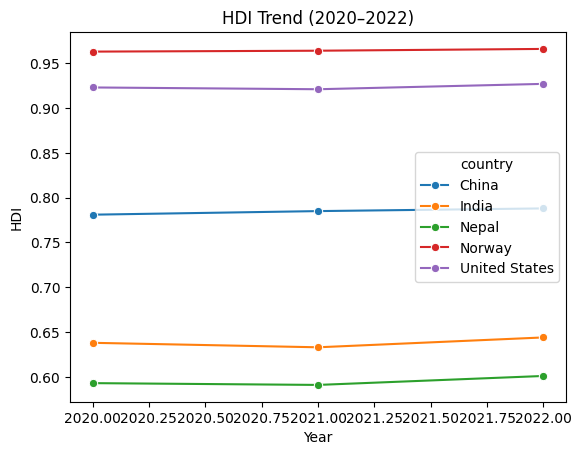

In [24]:
#Line chart
countries = ['Nepal', 'India', 'China', 'United States', 'Norway']
subset = hdi_2020_22[hdi_2020_22['country'].isin(countries)]

plt.figure()
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


In [25]:
hdi_2020_22.columns


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

Task 3B

Generate Visualizations:
–	Bar Chart: Average HDI by Region (2020–2022) ∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.


In [26]:
#Note:
#The dataset provided does not contain a region column.
#So, Dataset region column in manually created.
#Using a standard country–region UN classification.
#For the fulfillment of the assignment requiremnt.
#Manual creating a country to region mapping (based on UN classification)
country_region = {
    "Nepal": "South Asia",
    "India": "South Asia",
    "Pakistan": "South Asia",
    "Bangladesh": "South Asia",
    "Sri Lanka": "South Asia",
    "Bhutan": "South Asia",
    "Maldives": "South Asia",
    "Afghanistan": "South Asia",

    "United States": "North America",
    "Canada": "North America",

    "China": "East Asia",
    "Japan": "East Asia",

    "Norway": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe"
}


In [27]:
#Create region column
hdi_2020_22['region'] = hdi_2020_22['country'].map(country_region)

#Check missing mappings
hdi_2020_22['region'].isnull().sum()

#Keep only rows where region is defined
hdi_2020_22 = hdi_2020_22.dropna(subset=['region'])


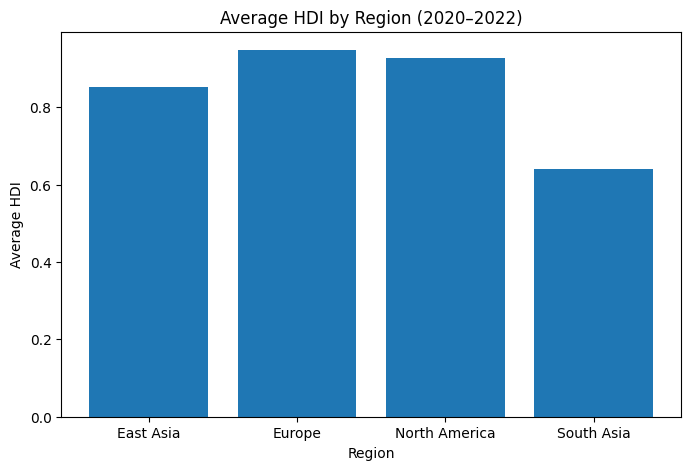

In [28]:
#finding average HDI by region
region_avg = hdi_2020_22.groupby('region')['hdi'].mean().reset_index()
region_avg

#Shwoing the plot
plt.figure(figsize=(8,5))
plt.bar(region_avg['region'], region_avg['hdi'])
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.show()





Task 3C

Box Plot: HDI Distribution for 2020, 2021, and 2022 ∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.


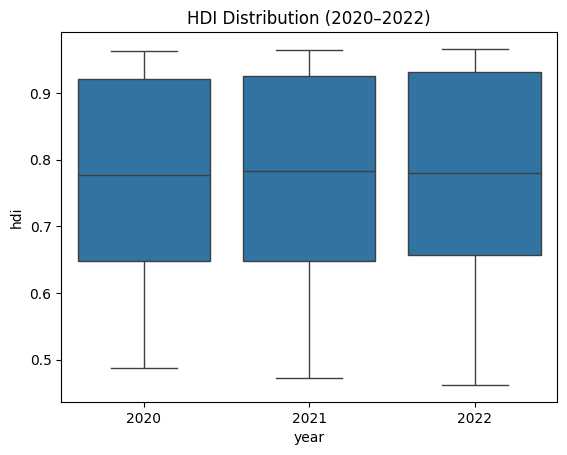

In [29]:
#HDI Distrbution
plt.figure()
sns.boxplot(data=hdi_2020_22, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


Task 3D

Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita. ∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."
•	Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.


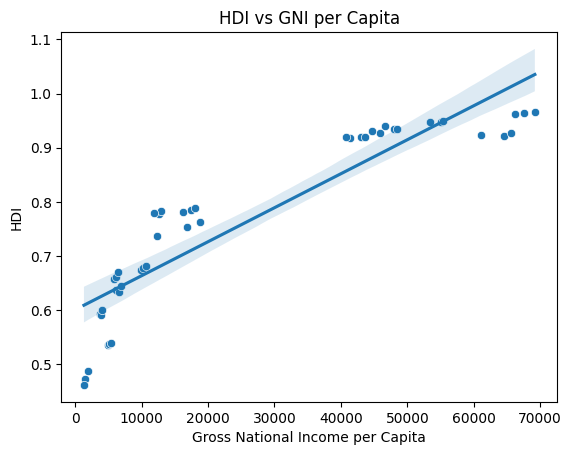

In [30]:
#Ensure 'gross_inc_percap' is numeric for hdi_2020_22
hdi_2020_22['gross_inc_percap'] = pd.to_numeric(hdi_2020_22['gross_inc_percap'], errors='coerce')

#Create a scatter plot using HDI as the dependent variable.

if 'gross_inc_percap' in hdi_2020_22.columns:
    plt.figure()
    sns.scatterplot(data=hdi_2020_22, x='gross_inc_percap', y='hdi')
    sns.regplot(
        data=hdi_2020_22,
        x='gross_inc_percap',
        y='hdi',
        scatter=False
    )

    #Use GNI per Capita on the x-axis.
    plt.title("HDI vs GNI per Capita")
    plt.xlabel("Gross National Income per Capita")
    plt.ylabel("HDI")
    plt.show()

    #If variable missing then not available output is shown.
else:
    print("GNI per Capita variable not available in the dataset.")

Problem 2
Advanced HDI Exploration


Objective:


Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detection, metric relationships, and gap analysis.


Tasks:
Complete all the following tasks:
1.Create South Asia Subset:
•	Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
•	Filter the HDI dataset to include only these countries.
•	Save the filtered dataset as HDI  SouthAsia.csv.


2.	Composite Development Score:
•	Create a new metric called Composite Score using the formula:
Composite Score =0.30× Life Expectancy Index +0.30× GNI per Capita Index}
Here: Life Expectancy Index →"life expectancy" and GNI per Capita Index →"gross inc  percap"
•	Rank South Asian countries based on Composite  Score.
•	Plot the top 5 countries in a horizontal bar chart.
•	Compare the ranking of countries by Composite  Score with their HDI ranking and discuss any differences.


3.	Outlier Detection:
•	Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
•	Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
•	Discuss why the identified countries stand out as outliers. 4. Exploring Metric Relationships:
•	Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life  expectancy"}).
•	Compute Pearson correlation of each metric with HDI.
•	Create scatter plots with trendlines to visualize the relationships.

•	Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.


5. Gap Analysis:
•	Create a new metric:
GNI  HDI Gap ="gross inc percap"−"hdi"
•	Rank South Asian countries by GNI HDI  Gap in descending and ascending order.
•	Plot the top 3 positive gaps and top 3 negative gaps.
•	Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.


Task 1: Creating South Asaia Subset

In [31]:
#Define South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

#Filtering dataset
south_asia_df = df[df['country'].isin(south_asia_countries)]

#Save dataset
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

south_asia_df['country'].unique()


array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

Task 2:Composite Development Score

In [32]:
#Convert required colums to numeric

south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

south_asia_df['life_expectancy'] = pd.to_numeric(
    south_asia_df['life_expectancy'], errors='coerce'
)

south_asia_df['gross_inc_percap'] = pd.to_numeric(
    south_asia_df['gross_inc_percap'], errors='coerce'
)

south_asia_df['hdi'] = pd.to_numeric(
    south_asia_df['hdi'], errors='coerce'
)



Create Composite Score

In [73]:
#Composite Score =0.30× Life Expectancy Index +0.30× GNI per Capita Index}
south_asia_df['Composite Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
    )


In [74]:
#Rank South Asian countries based on Composite Score
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022]

composite_rank = south_asia_2022.sort_values(
    by='Composite Score',
    ascending=False
)
composite_rank[['country', 'Composite Score', 'hdi']]


,country,Composite Score,hdi
14,Maldives,5678.289357,0.762
23,Sri Lanka,3592.832541,0.780
8,Bhutan,3209.130864,0.681
11,India,2105.481239,0.644
5,Bangladesh,1975.446053,0.670
20,Pakistan,1632.210427,0.540
17,Nepal,1228.811605,0.601
2,Afghanistan,419.425420,0.462


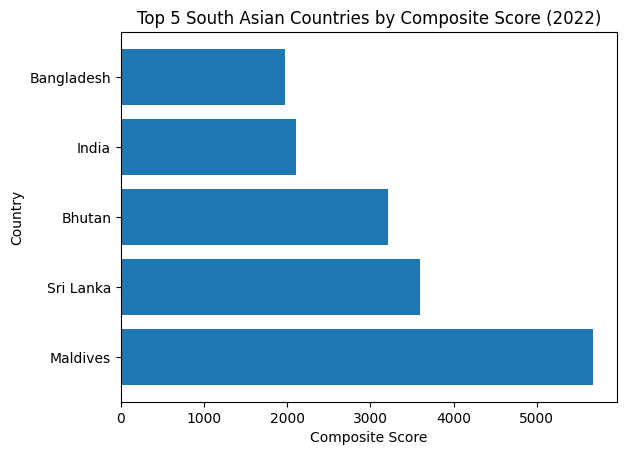

In [35]:
#Plot the top 5 countries in a horizontal bar chart
top5 = composite_rank.head(5)
plt.figure()
plt.barh(top5['country'], top5['Composite Score'])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.show()


Compare the ranking of countries by Composite  Score with their HDI ranking and discuss any differences.

In [36]:
#Comparing the ranking by composite score
hdi_rank = south_asia_2022.sort_values(
    by='hdi',
    ascending=False
)
hdi_rank[['country', 'hdi']]


,country,hdi
5477,Sri Lanka,0.780
3530,Maldives,0.762
659,Bhutan,0.681
461,Bangladesh,0.670
2573,India,0.644
4091,Nepal,0.601
4388,Pakistan,0.540
32,Afghanistan,0.462


Task 3: Outlier Detection


•Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.


•	Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.


•	Discuss why the identified countries stand out as outliers.

4. Exploring Metric Relationships:
•	Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life  expectancy"}).
•	Compute Pearson correlation of each metric with HDI.
•	Create scatter plots with trendlines to visualize the relationships.


•	Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.


In [38]:
#Outlier Detect
#Formula: (1.5*IQR Rule)
# Outlier Detection using 1.5 × IQR rule

Q1 = south_asia_2022['hdi'].quantile(0.25)
Q3 = south_asia_2022['hdi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

south_asia_2022.loc[:, 'HDI_Outlier'] = (
    (south_asia_2022['hdi'] < lower_limit) |
    (south_asia_2022['hdi'] > upper_limit)
)



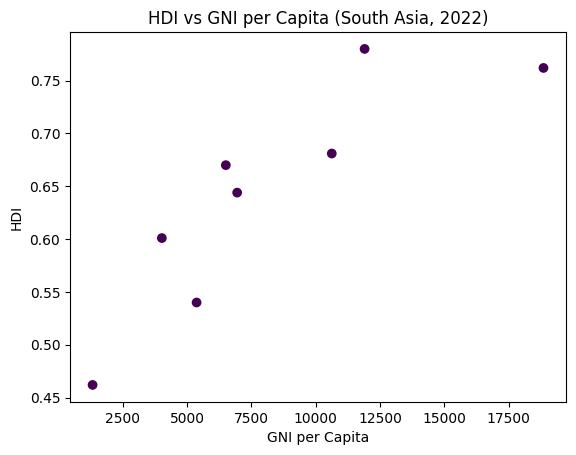

In [39]:
#Highlighted Outliers
plt.figure()
plt.scatter(
    south_asia_2022['gross_inc_percap'],
    south_asia_2022['hdi'],
    c=south_asia_2022['HDI_Outlier']
    )
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia, 2022)")
plt.show()


In [40]:

south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

#HDI Components (Gender Development & Life expectancy)

south_asia_2022['gender_development'] = pd.to_numeric(
    south_asia_2022['gender_development'], errors='coerce'
)

#Correlations
corr_gender = south_asia_2022['hdi'].corr(
    south_asia_2022['gender_development']
)
corr_life = south_asia_2022['hdi'].corr(
    south_asia_2022['life_expectancy']
)
#Compute correlation for gender development and life expectancy
corr_gender, corr_life


(np.float64(0.8847595354487648), np.float64(0.9281974040239386))

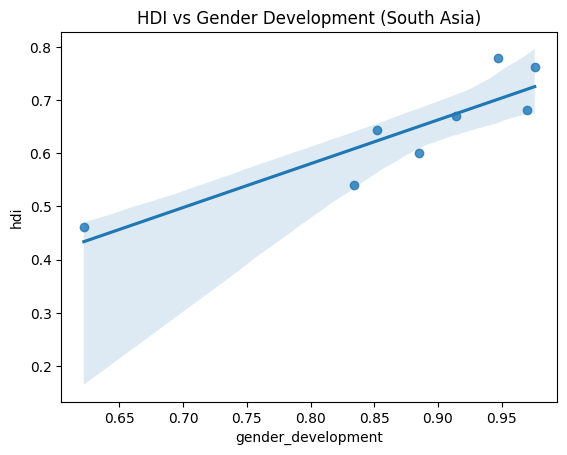

In [41]:
#Scatter plots with trendlines
plt.figure()
sns.regplot(
    data=south_asia_2022,
    x='gender_development',
    y='hdi'
)
#Plot for gender development
plt.title("HDI vs Gender Development (South Asia)")
#Show plot graph
plt.show()


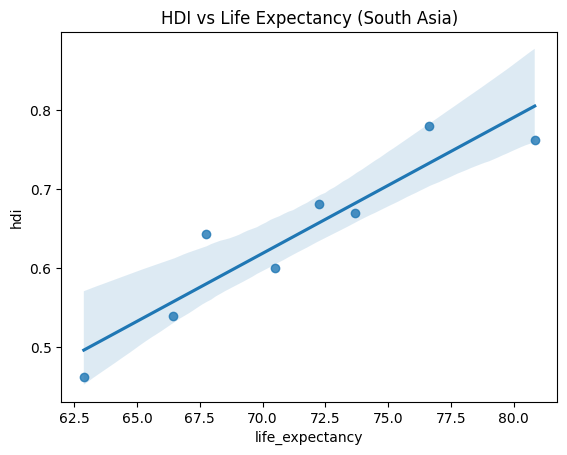

In [42]:
#Plot for life expectancy
plt.figure()
sns.regplot(
    data=south_asia_2022,
    x='life_expectancy',
    y='hdi'
)
plt.title("HDI vs Life Expectancy (South Asia)")
plt.show()


Task 4: Gap Analysis

In [43]:
#Gap analysis of GNI HDI

#Filtering
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

south_asia_2022['GNI_HDI_Gap'] = (
    south_asia_2022['gross_inc_percap'] -
    south_asia_2022['hdi']
)


In [44]:
#Rank South Asian countries by GNI HDI Gap

#Descending order
gap_desc = south_asia_2022.sort_values(
    by='GNI_HDI_Gap',
    ascending=False
)

#Ascending order

gap_asc = south_asia_2022.sort_values(
    by='GNI_HDI_Gap'
)

gap_desc[['country', 'GNI_HDI_Gap']]
gap_asc[['country', 'GNI_HDI_Gap']]


,country,GNI_HDI_Gap
32,Afghanistan,1334.743733
4091,Nepal,4024.953685
4388,Pakistan,5373.730423
461,Bangladesh,6510.452178
2573,India,6949.882798
659,Bhutan,10624.192880
5477,Sri Lanka,11898.718470
3530,Maldives,18846.030190


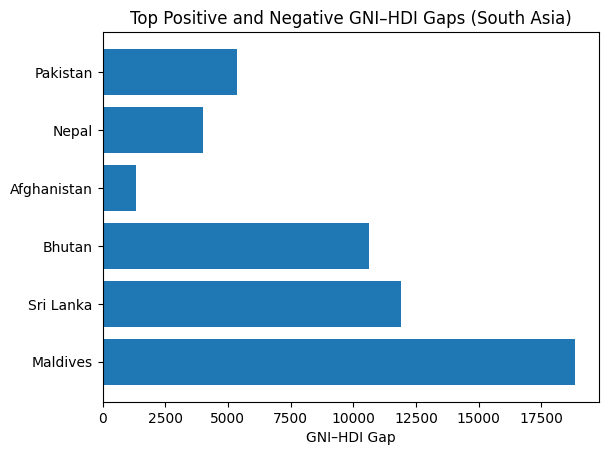

In [45]:
#Plot the top 3 positive gaps and top 3 negative gaps.
gap_plot = pd.concat([
    gap_desc.head(3),
    gap_asc.head(3)
])

plt.figure()

plt.barh(gap_plot['country'], gap_plot['GNI_HDI_Gap'])

plt.title("Top Positive and Negative GNI–HDI Gaps (South Asia)")

plt.xlabel("GNI–HDI Gap")

#Show the graph plot
plt.show()


Problem 3
Comparative Regional Analysis: South Asia vs Middle East


Objective:

Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using the 2020–2022 dataset from Problem 1B.


Tasks:


Complete all the following tasks:
1.	Create Middle East Subset:
•	Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
•	Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and Middle East.
•	Save these subsets as HDI  SouthAsia 2020  2022.csv and HDI MiddleEast 2020 2022.csv for use in subsequent tasks.


2.	Descriptive Statistics:
•	Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East) across 2020–2022.
•	Identify which region performs better on average.


3.	Top and Bottom Performers:
•	Identify the top 3 and bottom 3 countries in each region based on HDI.
•	Create a bar chart comparing these top and bottom performers across the two regions.


4.	Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
–	Gender Development Index {"gender  development"}
–	Life Expectancy Index {"life expectancy"}
–	GNI per Capita Index {"gross inc  percap"}
• Identify which metric shows the greatest disparity between regions.


5.	HDI Disparity:
•	Compute the range (max – min) of HDI for each region.
•	Compute the coefficient of variation (CV = std/mean) for HDI.
•	Identify which region exhibits more variation in HDI.


6.	Correlation Analysis:
•	For each region, compute correlations of HDI with:
–	Gender Development Index
–	Life Expectancy Index
•	Create scatter plots with trendlines for each correlation.
•	Interpret the strength and direction of these relationships.

7. Outlier Detection:
•	Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using the 1.5 × IQR rule.
•	Create scatter plots highlighting outliers in a different color.
•	Discuss the significance of these outliers.


Task 1: Create MiddleEast subset

In [46]:
import pandas as pd
df = pd.read_csv("/content/HDI_problem1B.csv")

In [47]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

In [48]:
#Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

#Load Problem 1B
hdi_2020_22 = pd.read_csv("HDI_problem1B.csv")

#South Asia subset
south_asia_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(south_asia_countries)
]

#Middle East subset
middle_east_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(middle_east_countries)
]

#Save files as csv inside drive.
south_asia_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Task 2: Descriptive Statistics

In [49]:
#Compute the mean and standard deviation

sa_mean = south_asia_2020_22['hdi'].mean()
sa_std = south_asia_2020_22['hdi'].std()

me_mean = middle_east_2020_22['hdi'].mean()
me_std = middle_east_2020_22['hdi'].std()

sa_mean, sa_std, me_mean, me_std


(np.float64(0.6395833333333333),
 0.09827331747496995,
 np.float64(0.7889090909090909),
 0.14129476362297624)

In [50]:
#Identifying the top 3 and bottom 3 countries in each region

sa_avg = south_asia_2020_22.groupby('country')['hdi'].mean().reset_index()
me_avg = middle_east_2020_22.groupby('country')['hdi'].mean().reset_index()
sa_tb = pd.concat([
    sa_avg.sort_values('hdi', ascending=False).head(3),
    sa_avg.sort_values('hdi').head(3)
])

me_tb = pd.concat([
    me_avg.sort_values('hdi', ascending=False).head(3),
    me_avg.sort_values('hdi').head(3)
])


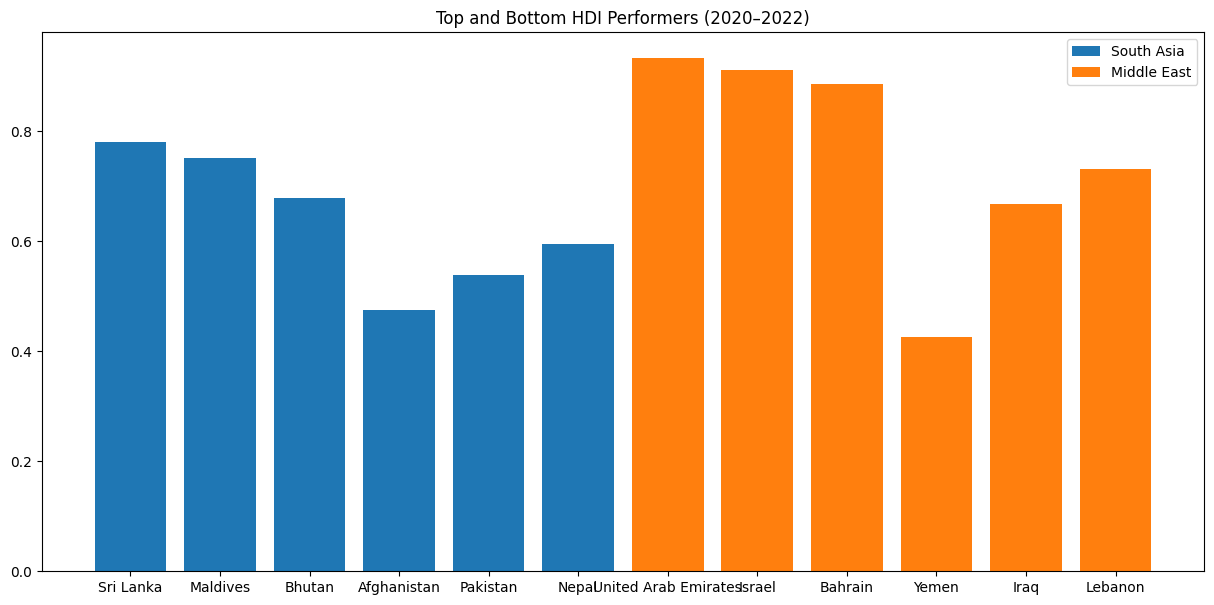

In [78]:
#Creating Bar Chart to compare
plt.figure(figsize=(15,7))
plt.bar(sa_tb['country'], sa_tb['hdi'], label='South Asia')
plt.bar(me_tb['country'], me_tb['hdi'], label='Middle East')
plt.legend()
plt.title("Top and Bottom HDI Performers (2020–2022)")
plt.show()


Task 4: Metrics Comparisions

In [52]:
#Compare the metrices

metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_metrics = south_asia_2020_22[metrics].mean()
me_metrics = middle_east_2020_22[metrics].mean()

metric_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': sa_metrics.values,
    'Middle East': me_metrics.values
})

metric_df


,Metric,South Asia,Middle East
0,gender_development,0.881458,0.896545
1,life_expectancy,70.970083,75.855455
2,gross_inc_percap,7766.509931,37750.770520


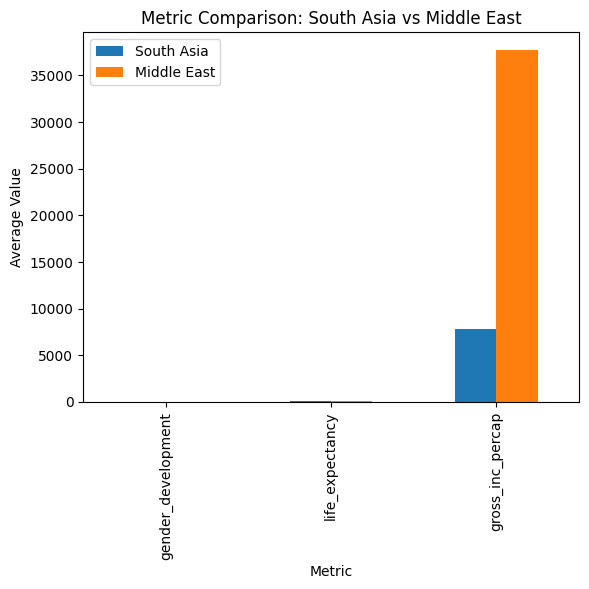

In [53]:
#Identifying which metrics shows the greatest disparity
metric_df.plot(
    x='Metric',
    kind='bar',
    title="Metric Comparison: South Asia vs Middle East"
)
plt.ylabel("Average Value")
plt.show()


Task 5: HDI Disparity

In [54]:
#Compute the range
sa_range = south_asia_2020_22['hdi'].max() - south_asia_2020_22['hdi'].min()
me_range = middle_east_2020_22['hdi'].max() - middle_east_2020_22['hdi'].min()

#Compute the variance and coefficient
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

sa_range, me_range, sa_cv, me_cv


(0.321,
 0.5130000000000001,
 np.float64(0.1536520924690084),
 np.float64(0.17910145193048382))

Task 6: Correlation Analysis

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")

In [56]:
#Filtering
south_asia_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(south_asia_countries)
].copy()

middle_east_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(middle_east_countries)
].copy()


south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

south_asia_2020_22['gender_development'] = pd.to_numeric(
    south_asia_2020_22['gender_development'], errors='coerce'
)
middle_east_2020_22['gender_development'] = pd.to_numeric(
    middle_east_2020_22['gender_development'], errors='coerce'
)

south_asia_2020_22['life_expectancy'] = pd.to_numeric(
    south_asia_2020_22['life_expectancy'], errors='coerce'
)
middle_east_2020_22['life_expectancy'] = pd.to_numeric(
    middle_east_2020_22['life_expectancy'], errors='coerce'
)


In [57]:


south_asia_2020_22[['hdi','gender_development','life_expectancy']].corr()


,hdi,gender_development,life_expectancy
hdi,1.000000,0.874218,0.938764
gender_development,0.874218,1.000000,0.853780
life_expectancy,0.938764,0.853780,1.000000


In [58]:
middle_east_2020_22[['hdi','gender_development','life_expectancy']].corr()


,hdi,gender_development,life_expectancy
hdi,1.000000,0.935670,0.933123
gender_development,0.935670,1.000000,0.912836
life_expectancy,0.933123,0.912836,1.000000


Outlier Detect (IQR)

In [59]:
#Outlier Detection using 1.5 × IQR rule

Q1 = south_asia_2022['hdi'].quantile(0.25)
Q3 = south_asia_2022['hdi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

south_asia_2022.loc[:, 'HDI_Outlier'] = (
    (south_asia_2022['hdi'] < lower_limit) |
    (south_asia_2022['hdi'] > upper_limit)
)


In [60]:
south_asia_2020_22.columns


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

In [61]:
#Create a Dataframe

south_asia_2020_22 = hdi_2020_22[
    hdi_2020_22['country'].isin(south_asia_countries)
].copy()


In [62]:
#Convert numeric columns
south_asia_2020_22['hdi'] = pd.to_numeric(
    south_asia_2020_22['hdi'], errors='coerce'
)

south_asia_2020_22['gross_inc_percap'] = pd.to_numeric(
    south_asia_2020_22['gross_inc_percap'], errors='coerce'
)


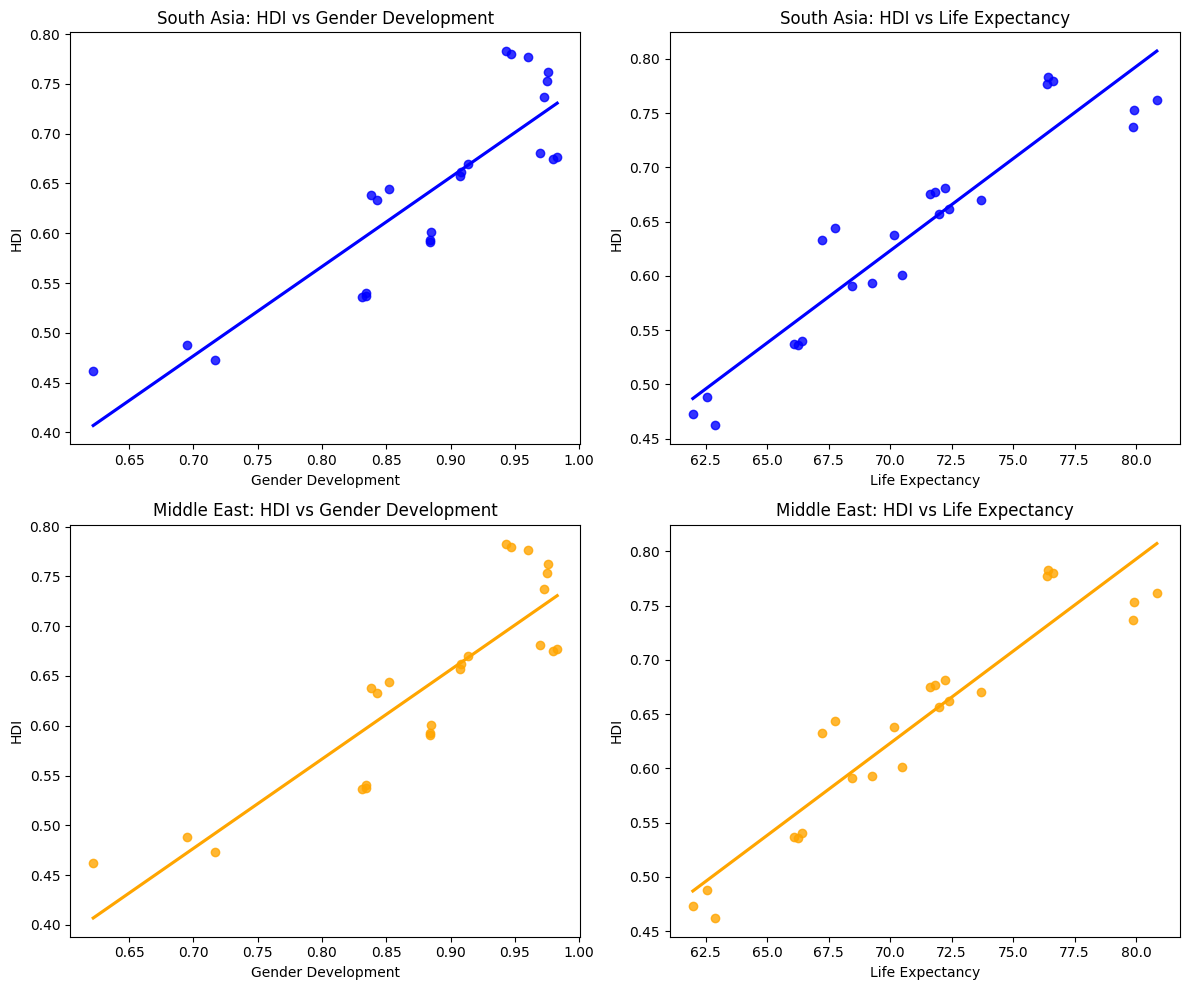

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["gender_development", "life_expectancy"]
regions = {
    "South Asia": south_asia_df,
    "Middle East": middle_east_df
}
colors = {"South Asia": "blue", "Middle East": "orange"}
#2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
plot_idx = 0
for region_name, df in regions.items():
    for metric in metrics:
        sns.regplot(
            x=df[metric],
            y=df["hdi"],
            ci=None,
            ax=axes[plot_idx],
            color=colors[region_name]
        )
        axes[plot_idx].set_title(f"{region_name}: HDI vs {metric.replace('_',' ').title()}")
        axes[plot_idx].set_xlabel(metric.replace('_',' ').title())
        axes[plot_idx].set_ylabel("HDI")
        plot_idx += 1

plt.tight_layout()
plt.show()


7.Outlier Detection:

• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using the 1.5 × IQR rule.

• Create scatter plots highlighting outliers in a different color.

• Discuss the significance of these outliers.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

In [65]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [66]:
#Check the column name in original dataset
south_asia_2020_22.columns


Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

In [67]:
sa_hdi_outliers, sa_hdi_lb, sa_hdi_ub = detect_outliers_iqr(south_asia_df, "hdi")
sa_gni_outliers, sa_gni_lb, sa_gni_ub = detect_outliers_iqr(south_asia_df, "gross_inc_percap")

print("South Asia HDI outliers:")
print(sa_hdi_outliers[["country", "year", "hdi"]])
print("\nSouth Asia GNI per Capita outliers:")
print(sa_gni_outliers[["country", "year", "gross_inc_percap"]])


South Asia HDI outliers:
Empty DataFrame
Columns: [country, year, hdi]
Index: []

South Asia GNI per Capita outliers:
Empty DataFrame
Columns: [country, year, gross_inc_percap]
Index: []


In [68]:
me_hdi_outliers, me_hdi_lb, me_hdi_ub = detect_outliers_iqr(middle_east_df, "hdi")
me_gni_outliers, me_gni_lb, me_gni_ub = detect_outliers_iqr(middle_east_df, "gross_inc_percap")

print("Middle East HDI outliers:")
print(me_hdi_outliers[["country", "year", "hdi"]])
print("\nMiddle East GNI per Capita outliers:")
print(me_gni_outliers[["country", "year", "gross_inc_percap"]])


Middle East HDI outliers:
   country  year    hdi
30   Yemen  2020  0.430
31   Yemen  2021  0.425
32   Yemen  2022  0.424

Middle East GNI per Capita outliers:
Empty DataFrame
Columns: [country, year, gross_inc_percap]
Index: []


In [69]:
def plot_outliers(df, x_col, y_col, region_name):
    outliers, _, _ = detect_outliers_iqr(df, y_col)

    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], color="green", label="Normal")
    plt.scatter(outliers[x_col], outliers[y_col], color="red", label="Outliers")

    plt.xlabel(x_col.replace('_', ' ').title())
    plt.ylabel(y_col.replace('_', ' ').title())
    plt.title(f"{region_name}: {y_col.replace('_', ' ').title()} vs {x_col.replace('_', ' ').title()} with Outliers")
    plt.legend()
    plt.show()


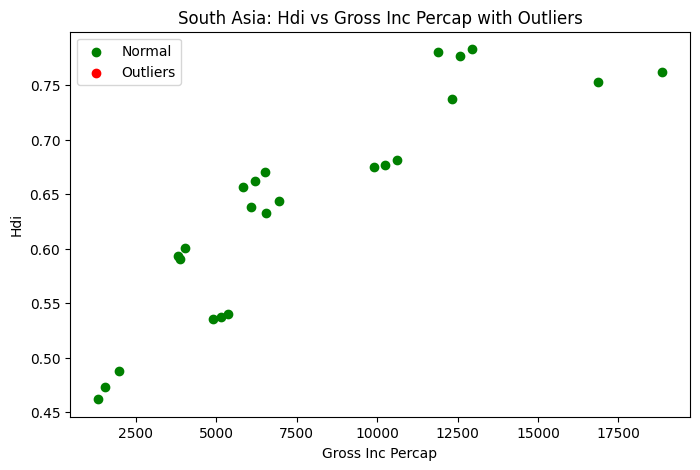

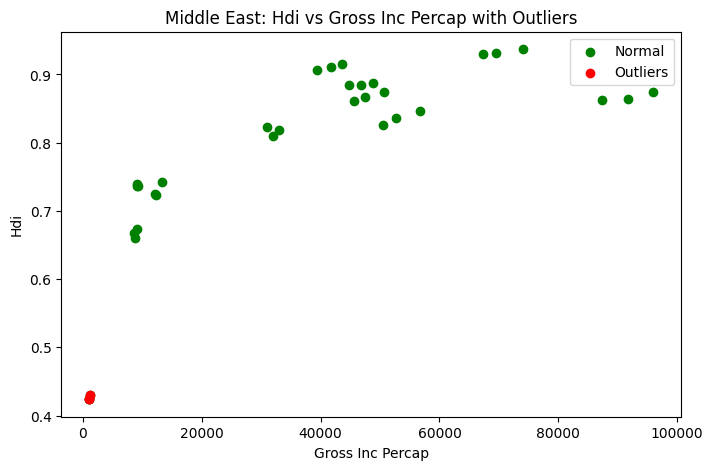

In [70]:
plot_outliers(south_asia_df, "gross_inc_percap", "hdi", "South Asia")
plot_outliers(middle_east_df, "gross_inc_percap", "hdi", "Middle East")
